In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from grover import oracle_8, inversion_8, oracle_1024, inversion_1024
from random import sample

### Create a list with n=8 where all elements are from integer range 1-8. However, one integer is missing.

In [2]:
int_list = sample(list(range(1, 9)), 7)

## Create a quantum circuit to find out the missing integer

In [3]:
def qc_circ(int_list):
    q = QuantumRegister(5) 
    c = ClassicalRegister(3)

    mycirc = QuantumCircuit(q,c)

    iterations = 2
    qbit = 3

    for i in range(qbit):
        mycirc.h(q[i])

    mycirc.x(q[3])
    mycirc.h(q[3])

    for i in range(iterations):
        oracle_8(mycirc, q, int_list)
        inversion_8(mycirc, q)

    mycirc.h(q[3])
    mycirc.x(q[3])

    for i in range(qbit):
        mycirc.measure(q[i],c[i])

    job = execute(mycirc,Aer.get_backend('qasm_simulator'), shots=10000)
    counts = job.result().get_counts(mycirc)
    
    freq = 0
    val = 0
    for outcome in counts:
        #print(outcome,"is observed",counts[outcome],"times")
        if counts[outcome]>freq:
            freq = counts[outcome]
            val = outcome
            
    print('missing integer in the list is %d' %(int(val, 2)+1))
    
    return mycirc

### Call the 'qc_circ' function and find out the missing integer

In [7]:
mycirc = qc_circ(int_list)

missing integer in the list is 4


### Check whether quantum circuit got the correct answer

In [8]:
sorted(int_list)

[1, 2, 3, 5, 6, 7, 8]

### This quantum circuit will only work if the input list contains exactly seven eleemnts. The lowest integer should be 1 not 0.

### I wanted to implement a circuit (already orcale and inversion function is written in 'grover.py') to take a input list with N=1023. Howevr, not able to finish due to time-constarint. 

### This circuit is extendable. If a quantum computer can provide 128 qubits, then this circuit could be extended to accomodate approximately N=2^60. As we need some qubits as control qubits and all the qubits could not be used to accomodate quantum states.

## Implemented quantum circuit

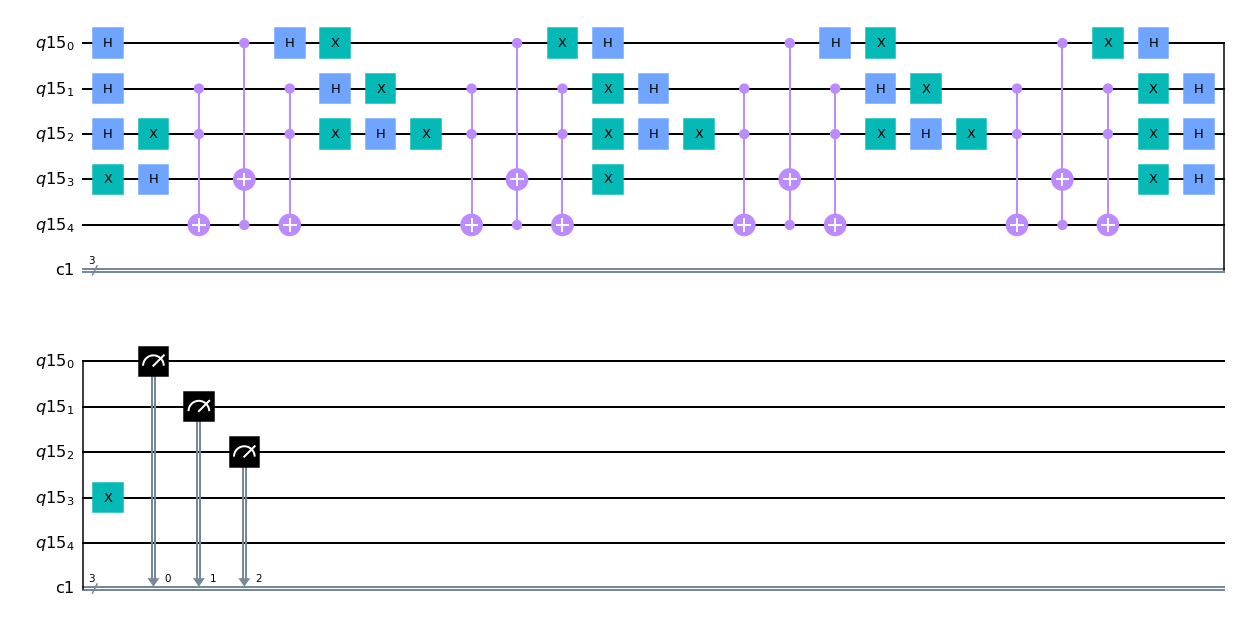

In [9]:
mycirc.draw(output='mpl')